In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import joblib

# Load the dataset you generated in Step 1
df = pd.read_csv('leaf_shelf_life_data.csv')

# Define Features (X) and Target (y)
X = df[['Avg_Temp_C', 'Humidity_Pct', 'Storage_Type', 'Transit_Days']]
y = df['Remaining_Shelf_Life']

In [2]:
# Split data: 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the Model
model.fit(X_train, y_train)
print("Model Training Complete!")

Model Training Complete!


In [3]:
# Make predictions
predictions = model.predict(X_test)

# Calculate Accuracy Metrics
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Mean Absolute Error: {mae:.2f} days")
print(f"R2 Score: {r2:.2f}")

Mean Absolute Error: 0.38 days
R2 Score: 0.98


In [4]:
# Save the model to a file so we can use it in a dashboard later
joblib.dump(model, 'leaf_model.pkl')
print("Model saved as leaf_model.pkl")

Model saved as leaf_model.pkl


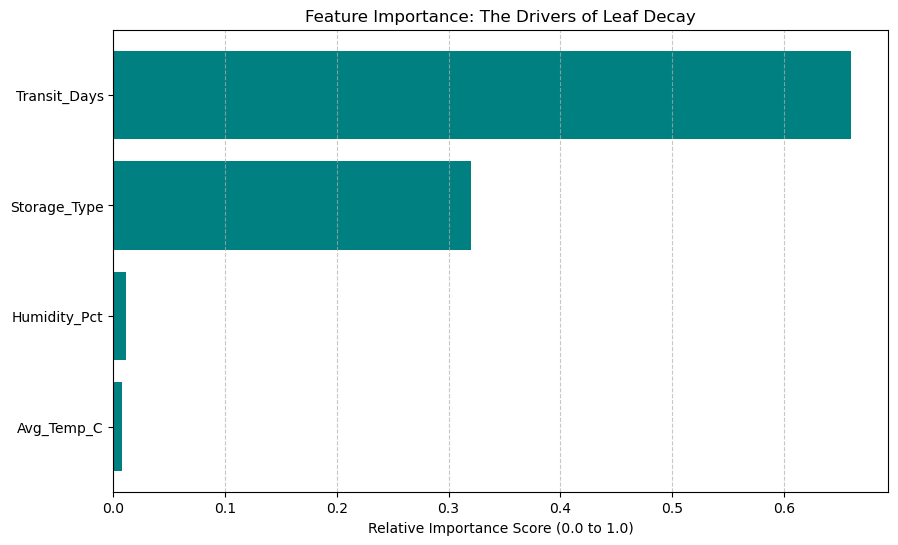

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# 1. Get the importance scores from the 100 trees
importances = model.feature_importances_
feature_names = X.columns

# 2. Sort the features from most to least important
indices = np.argsort(importances)

# 3. Create the plot
plt.figure(figsize=(10, 6))
plt.title("Feature Importance: The Drivers of Leaf Decay")
plt.barh(range(len(indices)), importances[indices], color='teal', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance Score (0.0 to 1.0)")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()